In [2]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
def compute_bow(features, centroids):
    distances = cdist(features, centroids, 'euclidean')
    feature_labels = np.argmin(distances, axis=1)
    
    bow_vector, _ = np.histogram(feature_labels, bins=np.arange(len(centroids) + 1))
    return bow_vector

In [4]:
def kmeans(data, k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    return kmeans.cluster_centers_

In [5]:
def train_knn_classifier(train_data, train_labels, n_neighbors):
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, n_jobs=-1)
    classifier.fit(train_data, train_labels)
    return classifier

In [6]:
X_train = np.load('train_D-1.npy', allow_pickle=True)
y_train = np.load('train_gs-1.npy', allow_pickle=True)
X_test = np.load('test_D-1.npy', allow_pickle=True)
y_test = np.load('test_gs.npy', allow_pickle=True)

In [7]:
kmeans_centroids = kmeans(np.concatenate(X_train), k=100)

train_histograms = np.array([compute_bow(x, kmeans_centroids) for x in X_train])
train_labels = np.array(y_train)[0,:]

test_histograms = np.array([compute_bow(x, kmeans_centroids) for x in X_test])
test_labels = np.array(y_test)[0,:]


knn_classifier = train_knn_classifier(train_histograms, train_labels, n_neighbors=8)

test_pred = knn_classifier.predict(test_histograms)

Overall categorization accuracy: 55.25%


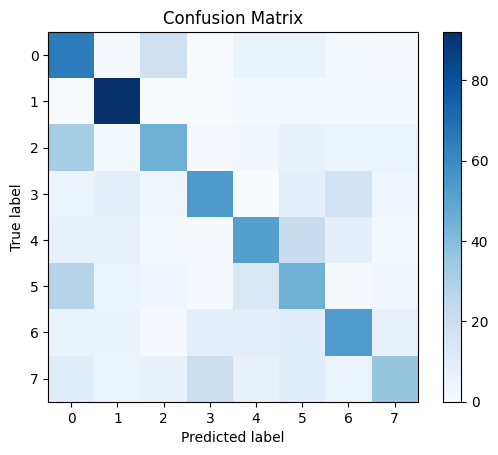

In [10]:
accuracy = accuracy_score(test_labels, test_pred)
print(f"Overall categorization accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(test_labels, test_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(set(test_labels.tolist())))
plt.xticks(tick_marks)
plt.yticks(tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()